In [65]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [66]:
#Reading data
data = pd.read_excel(r'C:\Users\jabir\Desktop\Datasets\telecom_churn.xlsx')
data.head()

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,...,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG
0,M,2.0,NaN,198,16.8,16.3,15.2,18.0,15.4,13.9,...,0.739130,0.000000,0.0,0.955526,1,NaN,NaN,5198,Amy H Thomas,0
1,M,1.0,NaN,114,2.9,4.6,19.0,16.1,11.6,13.6,...,1.576923,1.563786,0.0,0.938199,2,99.0,99.0,752,Ignatius T Lyod,1
2,M,2.0,24,114,2.5,4.7,18.5,18.8,19.4,16.8,...,1.538462,4.108014,5000.0,0.720440,3,47.0,47.0,3501,Leo C Wood,1
3,M,1.0,87,228,16.0,15.8,15.5,17.4,11.7,11.0,...,1.655172,0.000000,0.0,0.880032,4,NaN,NaN,5406,Augustine X Turner,0
4,F,4.0,22,168,14.6,14.1,16.3,13.5,13.4,14.6,...,1.733333,0.000000,0.0,1.282770,5,97.0,97.0,6115,Demie A Shaw,1


In [67]:
#Checking the shape of dataset
data.shape

(13196, 108)

In [68]:
#We have 108 columns
data.columns

Index(['GENDER_CD', 'EDUCATION_CD', 'OCCUPATION_CAT_CD', 'SUBS_TENURE',
       'OB_CALL_INTL_DUR_BASE_1', 'OB_CALL_INTL_DUR_BASE_2',
       'OB_CALL_INTL_DUR_BASE_3', 'OB_CALL_INTL_DUR_BASE_4',
       'OB_CALL_INTL_DUR_BASE_5', 'OB_CALL_INTL_DUR_BASE_6',
       ...
       'PROPN_IB_LOW_DUR', 'RATIO_SPEC_SMS_SMS_REV_AMT',
       'PCT_CHNG_SUSPENDED_CNT', 'PCT_CHNG_BILL_AMT', 'CUST_SUBS_ID',
       'TOT_REV_AMT', 'TOT_PROF_AMT', 'CUST_ID', 'name', 'CHURN_FLG'],
      dtype='object', length=108)

## Column Reduction

In [69]:
#Since the total duration of international calls is the average of international calls for 6 months, 
#we can drop those columns and take only the total duration columns

drop_columns= data[['OB_CALL_INTL_DUR_BASE_1', 'OB_CALL_INTL_DUR_BASE_2','OB_CALL_INTL_DUR_BASE_3', 'OB_CALL_INTL_DUR_BASE_4',
                  'OB_CALL_INTL_DUR_BASE_5', 'OB_CALL_INTL_DUR_BASE_6',
                  'OB_CALL_NAT_DUR_BASE_1', 'OB_CALL_NAT_DUR_BASE_2','OB_CALL_NAT_DUR_BASE_3', 'OB_CALL_NAT_DUR_BASE_4',
                  'OB_CALL_NAT_DUR_BASE_5', 'OB_CALL_NAT_DUR_BASE_6',
                  'OB_CALL_NAT_ROAM_CNT_BASE_1', 'OB_CALL_NAT_ROAM_CNT_BASE_2','OB_CALL_NAT_ROAM_CNT_BASE_3', 
                  'OB_CALL_NAT_ROAM_CNT_BASE_4','OB_CALL_NAT_ROAM_CNT_BASE_5', 'OB_CALL_NAT_ROAM_CNT_BASE_6',
                  'OB_CALL_LOC_DUR_BASE_1', 'OB_CALL_LOC_DUR_BASE_2','OB_CALL_LOC_DUR_BASE_3', 'OB_CALL_LOC_DUR_BASE_4',
                  'OB_CALL_LOC_DUR_BASE_5', 'OB_CALL_LOC_DUR_BASE_6',
                  'IB_CALL_PRD8_DUR_BASE_1','IB_CALL_PRD8_DUR_BASE_2','IB_CALL_PRD8_DUR_BASE_3','IB_CALL_PRD8_DUR_BASE_4',
                  'IB_CALL_PRD8_DUR_BASE_5','IB_CALL_PRD8_DUR_BASE_6',
                  'OB_CALL_DUR_BASE_1','OB_CALL_DUR_BASE_2','OB_CALL_DUR_BASE_3','OB_CALL_DUR_BASE_4','OB_CALL_DUR_BASE_5',
                  'OB_CALL_DUR_BASE_6']]

data_new = data.drop(columns=drop_columns)
data_new.head()
data_new.shape


(13196, 72)

In [70]:
#Finding the mean of revenue for 6 months and assigning that value to a new column 'TOT_REV_AMT'
#to reduce the number of columns

data_new['TOT_REV_AMT'] = round(data_new[['REV_AMT_BASE_1','REV_AMT_BASE_2','REV_AMT_BASE_3','REV_AMT_BASE_4','REV_AMT_BASE_5',
                                    'REV_AMT_BASE_6']].mean(axis=1))

data_new1= data_new.drop(columns=['REV_AMT_BASE_1','REV_AMT_BASE_2','REV_AMT_BASE_3','REV_AMT_BASE_4','REV_AMT_BASE_5',
                                    'REV_AMT_BASE_6'])
data_new1.shape

(13196, 66)

In [71]:
#Finding mean of the revenue due to services like internet,gprs and fixline to a single column 'TOT_REV_SERVICE_AMT'
data_new1['TOT_REV_SERVICE_AMT'] = round(data_new1[['TOT_REV_FIX_AMT','TOT_REV_GPRS_AMT','TOT_REV_INET_AMT']].mean(axis=1))
data_new2 = data_new1.drop(columns=['TOT_REV_FIX_AMT','TOT_REV_GPRS_AMT','TOT_REV_INET_AMT'])
data_new2.shape

(13196, 64)

In [72]:
#Finding mean of outstanding amount for 60 days and adding to a single column 'TOT_OUTSTAND_AMT'
data_new2['TOT_OUTSTAND_AMT']= round(data_new2[['TOT_OUTSTAND_30_60_DAY_AMT', 'TOT_OUTSTAND_30_DAY_AMT',
                                          'TOT_OUTSTAND_60_90_DAY_AMT']].mean(axis=1))
data_new3 = data_new2.drop(columns= ['TOT_OUTSTAND_30_60_DAY_AMT', 'TOT_OUTSTAND_30_DAY_AMT',
                                          'TOT_OUTSTAND_60_90_DAY_AMT'])
data_new3.shape


(13196, 62)

In [73]:
new_data = data_new3
new_data.head()

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,TOT_CALL_INTL_ROAM_DUR,TOT_OB_CALL_INTL_DUR,TOT_OB_CALL_LOC_DUR,TOT_OB_CALL_NAT_DUR,TOT_IB_CALL_DUR,AVG_OB_CALL_DUR,...,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG,TOT_REV_SERVICE_AMT,TOT_OUTSTAND_AMT
0,M,2.0,NaN,198,7.967,7.967,95.6,39.833,54.167,159.333,...,0.0,0.955526,1,731.0,NaN,5198,Amy H Thomas,0,0.0,0.0
1,M,1.0,NaN,114,5.650,5.650,67.8,28.250,13.333,113.000,...,0.0,0.938199,2,832.0,99.0,752,Ignatius T Lyod,1,243.0,190.0
2,M,2.0,24,114,6.725,6.725,80.7,33.625,12.333,134.500,...,5000.0,0.720440,3,742.0,47.0,3501,Leo C Wood,1,191.0,393.0
3,M,1.0,87,228,7.283,7.283,87.4,36.417,49.667,145.667,...,0.0,0.880032,4,602.0,NaN,5406,Augustine X Turner,0,0.0,0.0
4,F,4.0,22,168,7.208,7.208,86.5,36.042,16.333,144.167,...,0.0,1.282770,5,664.0,97.0,6115,Demie A Shaw,1,0.0,0.0


## Finding and Handling Null Values

In [74]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 62 columns):
GENDER_CD                       13100 non-null object
EDUCATION_CD                    10295 non-null float64
OCCUPATION_CAT_CD               6514 non-null object
SUBS_TENURE                     13196 non-null int64
TOT_CALL_INTL_ROAM_DUR          13196 non-null float64
TOT_OB_CALL_INTL_DUR            13196 non-null float64
TOT_OB_CALL_LOC_DUR             13196 non-null float64
TOT_OB_CALL_NAT_DUR             13196 non-null float64
TOT_IB_CALL_DUR                 13196 non-null float64
AVG_OB_CALL_DUR                 13196 non-null float64
TOT_IB_CALL_CNT                 13196 non-null int64
AVG_OB_CALL_CNT                 13196 non-null int64
TOT_OB_CALL_NAT_ROAM_CNT        13196 non-null int64
TOT_OB_CALL_INTL_CNT            13196 non-null int64
TOT_OB_CALL_LOC_CNT             13196 non-null int64
TOT_OB_CALL_NAT_CNT             13196 non-null int64
TOT_OB_CALL_INTL_ROAM_CNT   

In [75]:
#Finding null values 
new_data.isnull().sum()

GENDER_CD                   96
EDUCATION_CD              2901
OCCUPATION_CAT_CD         6682
SUBS_TENURE                  0
TOT_CALL_INTL_ROAM_DUR       0
                          ... 
CUST_ID                      0
name                         0
CHURN_FLG                    0
TOT_REV_SERVICE_AMT          0
TOT_OUTSTAND_AMT             0
Length: 62, dtype: int64

In [76]:
#Finding null values using info()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 62 columns):
GENDER_CD                       13100 non-null object
EDUCATION_CD                    10295 non-null float64
OCCUPATION_CAT_CD               6514 non-null object
SUBS_TENURE                     13196 non-null int64
TOT_CALL_INTL_ROAM_DUR          13196 non-null float64
TOT_OB_CALL_INTL_DUR            13196 non-null float64
TOT_OB_CALL_LOC_DUR             13196 non-null float64
TOT_OB_CALL_NAT_DUR             13196 non-null float64
TOT_IB_CALL_DUR                 13196 non-null float64
AVG_OB_CALL_DUR                 13196 non-null float64
TOT_IB_CALL_CNT                 13196 non-null int64
AVG_OB_CALL_CNT                 13196 non-null int64
TOT_OB_CALL_NAT_ROAM_CNT        13196 non-null int64
TOT_OB_CALL_INTL_CNT            13196 non-null int64
TOT_OB_CALL_LOC_CNT             13196 non-null int64
TOT_OB_CALL_NAT_CNT             13196 non-null int64
TOT_OB_CALL_INTL_ROAM_CNT   

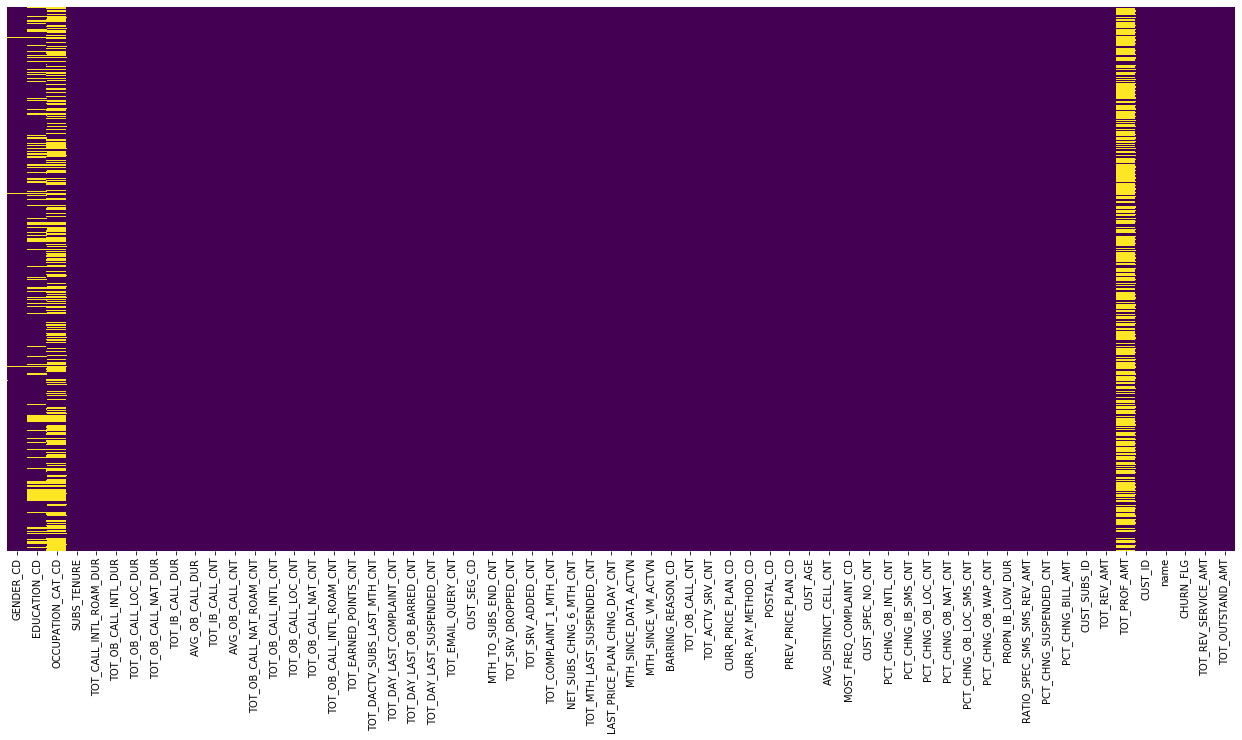

In [77]:
#Finding null values using heatmap
plt.figure(figsize=(22,10))
sns.heatmap(new_data.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [79]:
#Replacing null values in GENDER_CD with most frequent values
new_data['GENDER_CD'].value_counts()
new_data['GENDER_CD'].fillna(new_data['GENDER_CD'].value_counts().index[0],inplace=True)
new_data['GENDER_CD'].isnull().sum()



0

In [80]:
#Replacing null values in EDUCATION_CD with the median
edu_median = new_data['EDUCATION_CD'].median()

new_data['EDUCATION_CD'].fillna(edu_median,inplace=True)
new_data['EDUCATION_CD'].isnull().sum()


0

In [81]:
#There are more than 50% null values in OCCUPATION_CAT_CD column (only 6515 non-null values from info()), 
#so we can drop that column
new_data.drop(columns='OCCUPATION_CAT_CD',inplace=True)

In [82]:
#There are more than 50% null values in TOT_PROF_AMT column (only 4171  non-null values from info()),
#so we are dropping that column too
new_data.drop(columns='TOT_PROF_AMT',inplace=True)


In [83]:
#Shape of the new dataset
new_data.shape

(13196, 60)

In [84]:
new_data.CHURN_FLG.value_counts()

0    12105
1     1091
Name: CHURN_FLG, dtype: int64

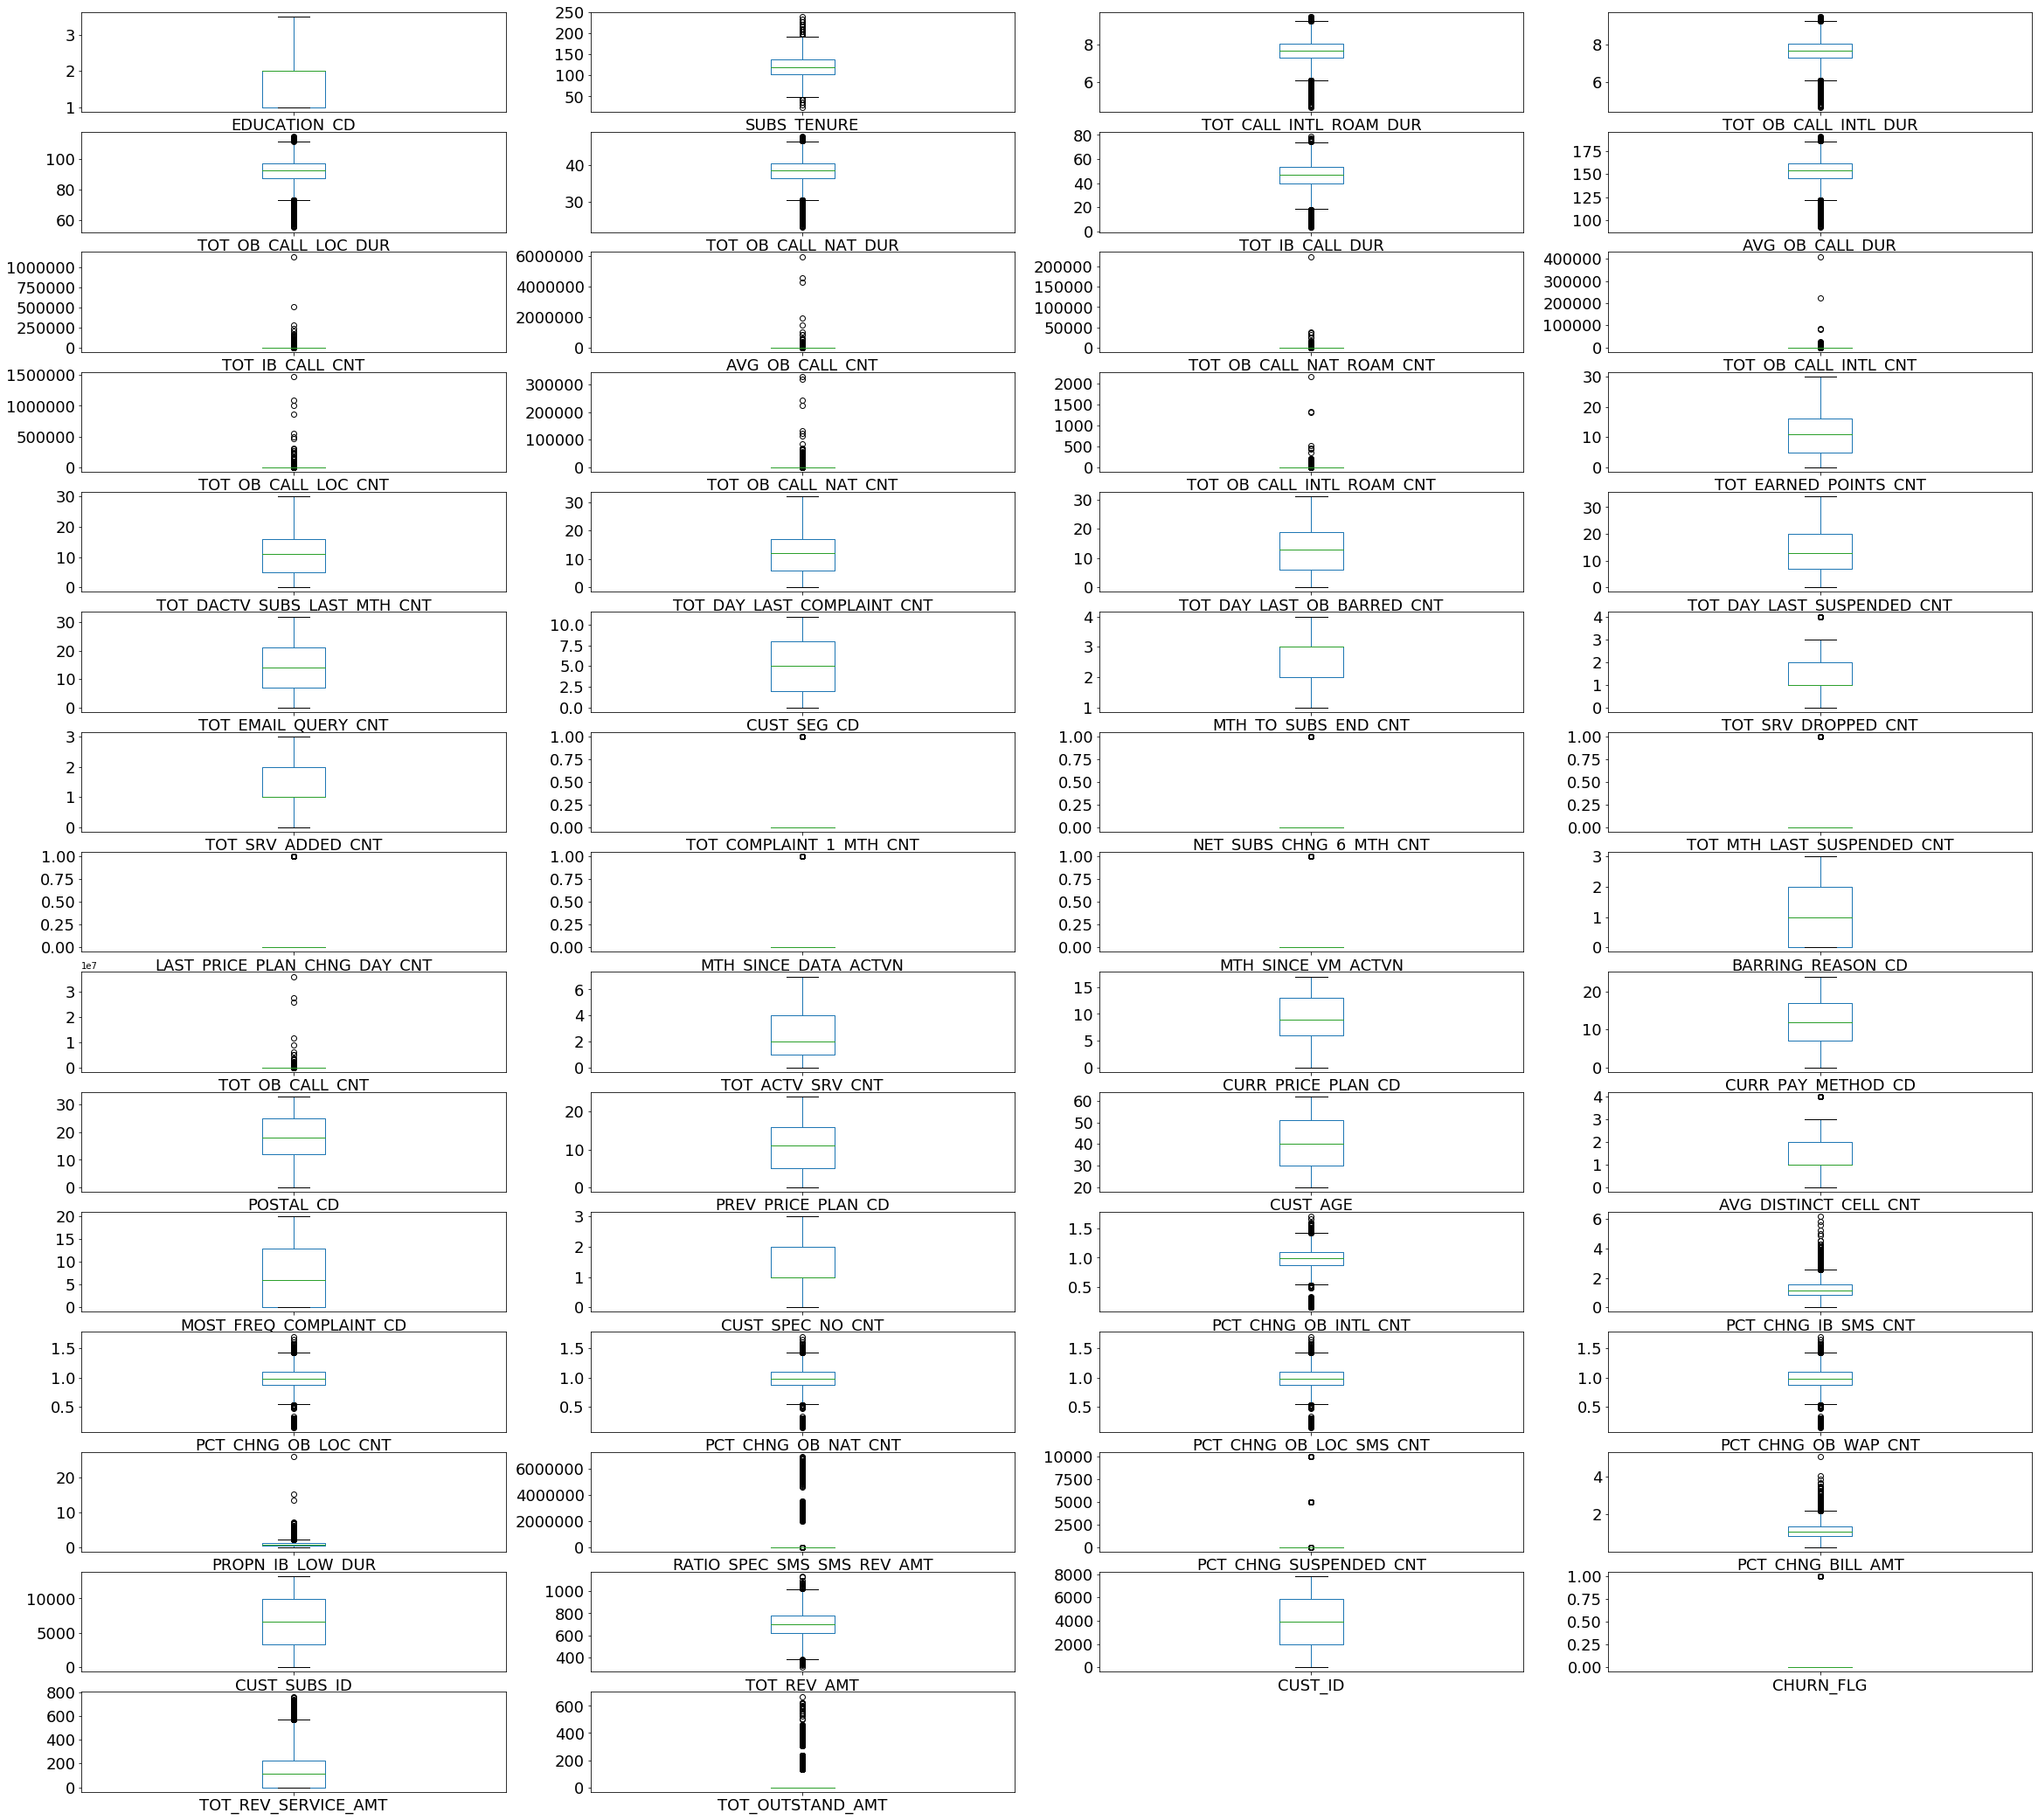

In [87]:
#Plotting boxplot for all the columns 
new_data.plot(kind='box', subplots=True, layout= (16,4), fontsize=18, figsize=(40,40));

In [88]:
#To get the names of columns
new_data.columns

Index(['GENDER_CD', 'EDUCATION_CD', 'SUBS_TENURE', 'TOT_CALL_INTL_ROAM_DUR',
       'TOT_OB_CALL_INTL_DUR', 'TOT_OB_CALL_LOC_DUR', 'TOT_OB_CALL_NAT_DUR',
       'TOT_IB_CALL_DUR', 'AVG_OB_CALL_DUR', 'TOT_IB_CALL_CNT',
       'AVG_OB_CALL_CNT', 'TOT_OB_CALL_NAT_ROAM_CNT', 'TOT_OB_CALL_INTL_CNT',
       'TOT_OB_CALL_LOC_CNT', 'TOT_OB_CALL_NAT_CNT',
       'TOT_OB_CALL_INTL_ROAM_CNT', 'TOT_EARNED_POINTS_CNT',
       'TOT_DACTV_SUBS_LAST_MTH_CNT', 'TOT_DAY_LAST_COMPLAINT_CNT',
       'TOT_DAY_LAST_OB_BARRED_CNT', 'TOT_DAY_LAST_SUSPENDED_CNT',
       'TOT_EMAIL_QUERY_CNT', 'CUST_SEG_CD', 'MTH_TO_SUBS_END_CNT',
       'TOT_SRV_DROPPED_CNT', 'TOT_SRV_ADDED_CNT', 'TOT_COMPLAINT_1_MTH_CNT',
       'NET_SUBS_CHNG_6_MTH_CNT', 'TOT_MTH_LAST_SUSPENDED_CNT',
       'LAST_PRICE_PLAN_CHNG_DAY_CNT', 'MTH_SINCE_DATA_ACTVN',
       'MTH_SINCE_VM_ACTVN', 'BARRING_REASON_CD', 'TOT_OB_CALL_CNT',
       'TOT_ACTV_SRV_CNT', 'CURR_PRICE_PLAN_CD', 'CURR_PAY_METHOD_CD',
       'POSTAL_CD', 'PREV_PRICE_PLAN_CD', 

In [91]:
#Creating a list with the names of columns with outliers called 'putlier_columns'

outlier_columns = ['EDUCATION_CD', 'SUBS_TENURE', 'TOT_CALL_INTL_ROAM_DUR',
       'TOT_OB_CALL_INTL_DUR', 'TOT_OB_CALL_LOC_DUR', 'TOT_OB_CALL_NAT_DUR',
       'TOT_IB_CALL_DUR', 'AVG_OB_CALL_DUR', 'TOT_IB_CALL_CNT',
       'AVG_OB_CALL_CNT', 'TOT_OB_CALL_NAT_ROAM_CNT', 'TOT_OB_CALL_INTL_CNT',
       'TOT_OB_CALL_LOC_CNT', 'TOT_OB_CALL_NAT_CNT',
       'TOT_OB_CALL_INTL_ROAM_CNT','TOT_OB_CALL_CNT','PCT_CHNG_OB_INTL_CNT',
       'PCT_CHNG_IB_SMS_CNT', 'PCT_CHNG_OB_LOC_CNT', 'PCT_CHNG_OB_NAT_CNT',
       'PCT_CHNG_OB_LOC_SMS_CNT', 'PCT_CHNG_OB_WAP_CNT', 'PROPN_IB_LOW_DUR',
       'RATIO_SPEC_SMS_SMS_REV_AMT', 'PCT_CHNG_SUSPENDED_CNT',
       'PCT_CHNG_BILL_AMT', 'CUST_SUBS_ID', 'TOT_REV_AMT','TOT_REV_SERVICE_AMT', 'TOT_OUTSTAND_AMT']

#Removing outliers using IQR method

for i in outlier_columns:
    Q1 = new_data[i].quantile(0.25)
    Q3 = new_data[i].quantile(0.75)
    IQR = Q3-Q1
    
    lb = Q1-1.5*IQR
    ub = Q3+1.5*IQR
    
    new_data[i] = np.where(new_data[i] < lb, lb, new_data[i])
    new_data[i] = np.where(new_data[i] > ub, ub, new_data[i])


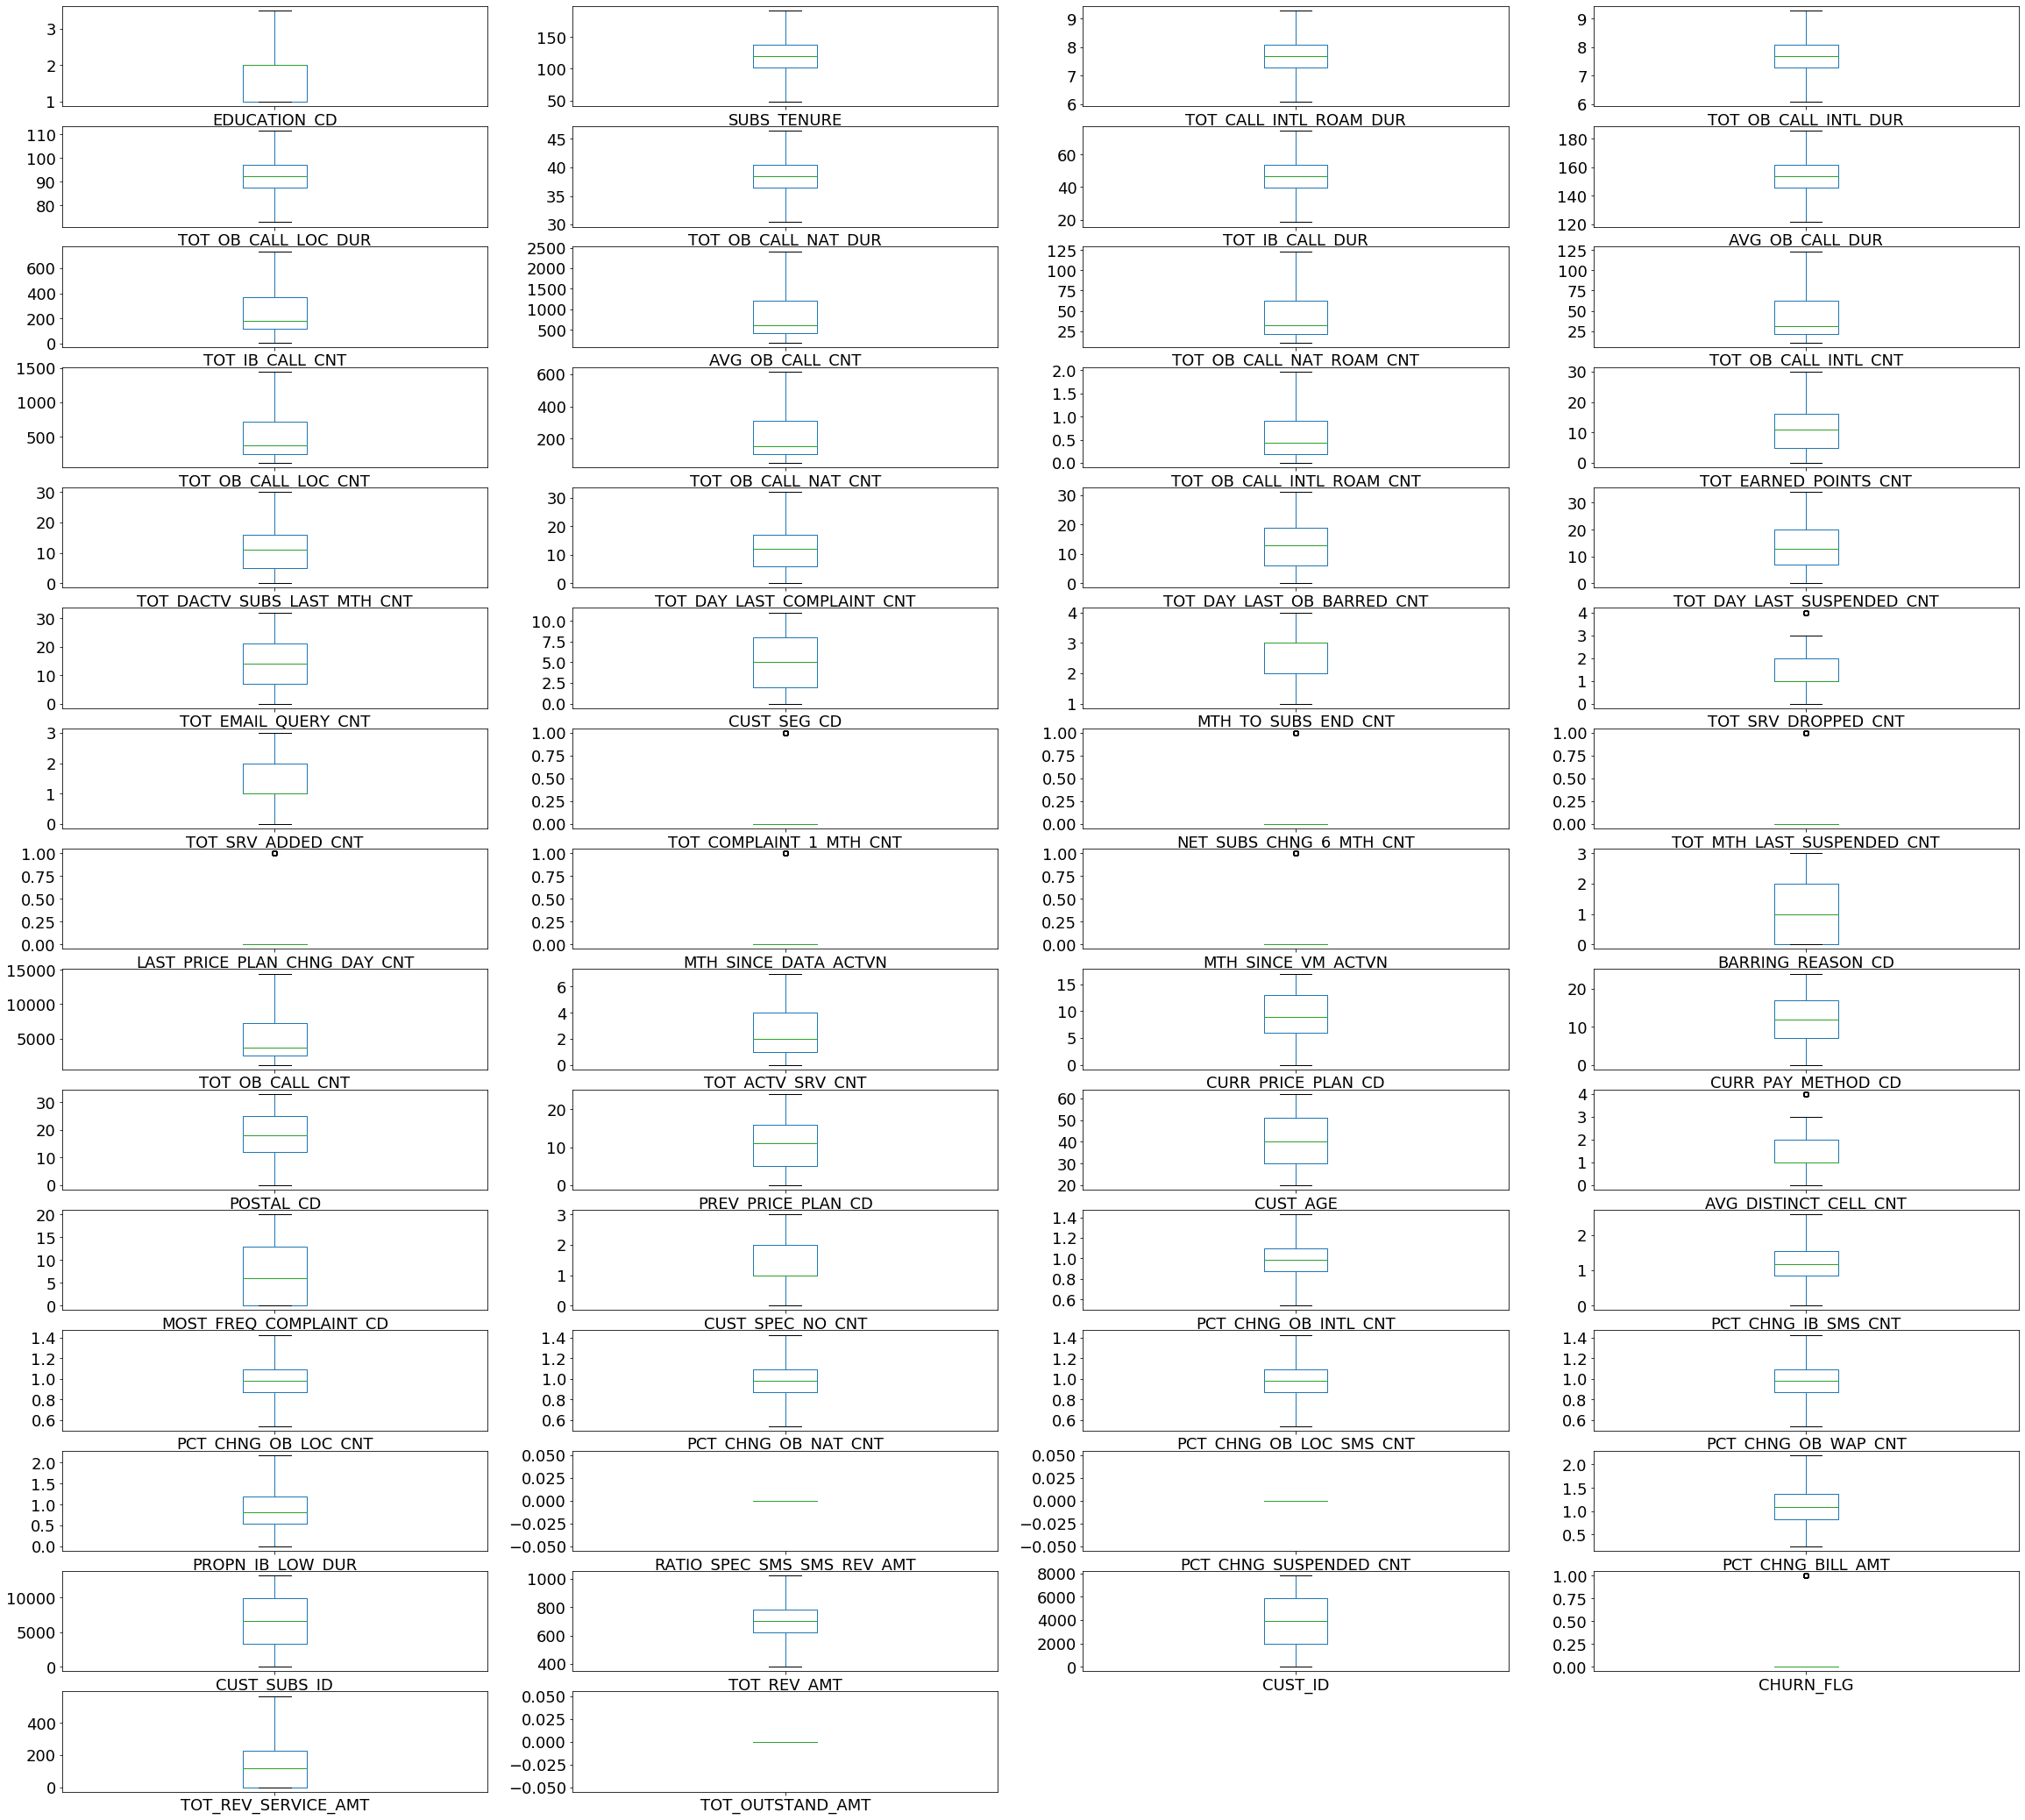

In [92]:
# Plotting boxplots to make sure the outliers are removed
new_data.plot(kind='box', subplots=True, layout= (16,4), fontsize=18, figsize=(40,40));

In [95]:
#Checking for duplicated values
new_data.duplicated().value_counts()

False    13196
dtype: int64